In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/CopyofCustomers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/CopyofTransactions.csv')


In [3]:
# Merge datasets
data = pd.merge(customers, transactions, on='CustomerID')

In [4]:
# Aggregate transaction data
agg_data = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count'
}).reset_index()
agg_data.columns = ['CustomerID', 'TotalSpend', 'AvgSpend', 'NumTransactions']


In [5]:
# Merge with customer profile data
final_data = pd.merge(customers, agg_data, on='CustomerID')


In [6]:
# Encode and scale data
final_data['Region'] = final_data['Region'].astype('category').cat.codes
features = final_data[['TotalSpend', 'AvgSpend', 'NumTransactions', 'Region']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [7]:
# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
final_data['Cluster'] = clusters


In [8]:
# Evaluation
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 1.202800531291985
Silhouette Score: 0.26016176087678383


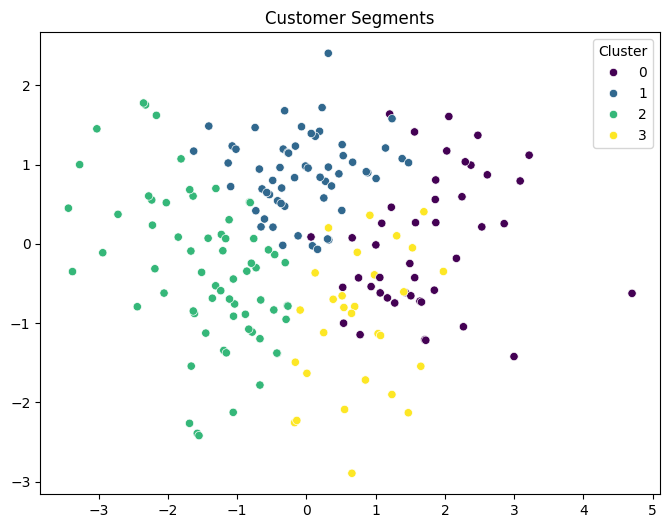

In [9]:
# Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=final_data['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.show()
